# SIMPLE LINEAR REGRESSION

## Import Required Libraries

In [65]:
import pandas as pd
import numpy as np
import seaborn as sns
import statsmodels.formula.api as smf
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')

## Read the data

In [66]:
data=pd.read_csv('delivery_time.csv')
data.head()

,Delivery Time,Sorting Time
0,21.00,10
1,13.50,4
2,19.75,6
3,24.00,9
4,29.00,10


## Initial Data Analysis

In [67]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21 entries, 0 to 20
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Delivery Time  21 non-null     float64
 1   Sorting Time   21 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 468.0 bytes


- Data is too small
- Both are numerical variables
- No null values

In [68]:
data.duplicated().sum()

np.int64(0)

- No duplicte found

## EDA

#### **Descriptive Analysis** 

In [69]:
data.describe()

,Delivery Time,Sorting Time
count,21.000000,21.000000
mean,16.790952,6.190476
std,5.074901,2.542028
min,8.000000,2.000000
25%,13.500000,4.000000
50%,17.830000,6.000000
75%,19.750000,8.000000
max,29.000000,10.000000


- Both variables exhibit slight right-skewness, as their means are greater than their medians.
- The spread (standard deviation) is higher for Delivery Time, showing greater inconsistency in delivery compared to sorting.
- Outliers could potentially exist in higher ranges for both variables as 75 percentile and max shows wide gap.
- The interquartile range (IQR) for Delivery Time is 19.75 - 13.5 = 6.25, and for Sorting Time, it is 8 - 4 = 4, indicating moderate variability for both.

#### **Correlation analysis** 
- measures the strength and direction of the relationship between two variables

In [70]:
data.corr()  

,Delivery Time,Sorting Time
Delivery Time,1.000000,0.825997
Sorting Time,0.825997,1.000000


- Strong positive relationship between to variables.

#### **PairPlot** 

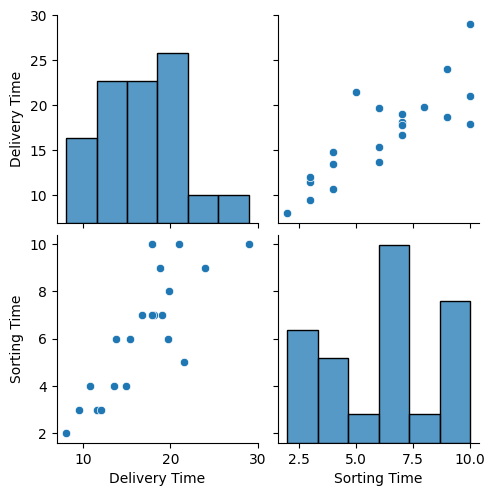

In [71]:
sns.pairplot(data)

- Distribution of Delivery Time: The histogram on the top left shows the distribution of delivery times. It appears to be right-skewed, meaning there are more deliveries with shorter times than longer ones.

- Distribution of Sorting Time: The histogram on the bottom right shows the distribution of sorting times. It is also right-skewed, indicating that there are more instances of shorter sorting times.

- Scatter Plot (Top Right): This plot visually reinforces the positive correlation between sorting and delivery times. As sorting time increases, there is a general trend of increasing delivery times.

- Scatter Plot (Bottom Left): This plot also shows the relationship between sorting and delivery times. However, it appears that the data points are more spread out compared to the top right plot, suggesting that the relationship might not be as strong.

#### **Distance Plot** 
- Distribution plot is a visualization tool used to explore the distribution of a dataset. It combines a histogram with a kernel density estimate (KDE) curve.

<Axes: xlabel='Delivery Time', ylabel='Density'>

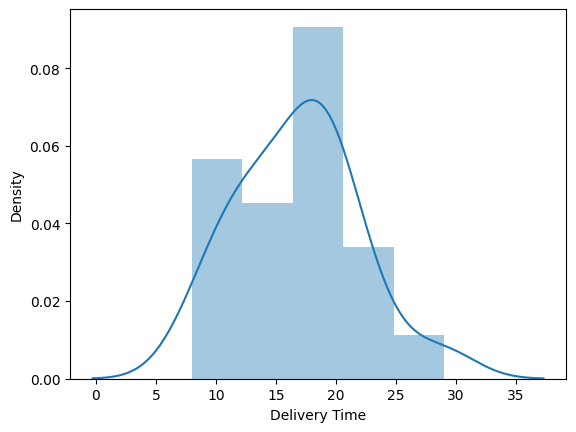

In [72]:
sns.distplot(data['Delivery Time'])  

- Central Tendency: The peak of the distribution are to be around 15-20 delivery time units. This suggests that a majority of deliveries fall within this range.

#### **Regression Plot** 
- The regplot (regression plot) is a visualization tool that displays the relationship between two variables as a scatter plot, along with a fitted regression line. The regression line represents the best-fit linear relationship between the variables, indicating how changes in one variable are associated with changes in the other.

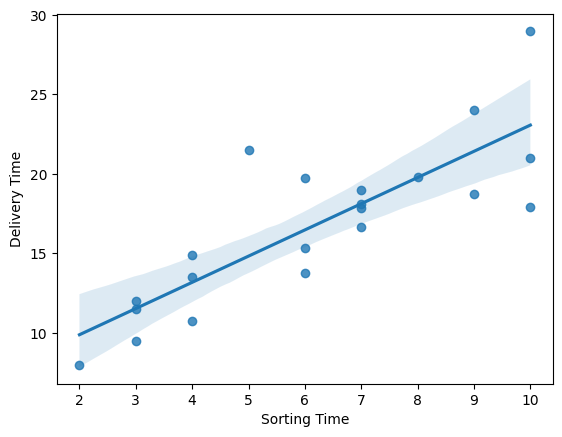

In [73]:
sns.regplot(x="Sorting Time",y="Delivery Time",data=data);

Notes:
 - The points far from regression line are consider as outliers.
 - As X (sorting_time) increases y(delivery_time) increases which states that positive relationship between variables.
 - Closer data points to the regression line indicate a better fit.

![regplot](Screenshot%202024-12-25%20174854.png)

#### **Hetroscedasticity** 
- The spread of residuals (differences between observed and predicted values) increases or decreases systematically with the independent variable or the fitted values.


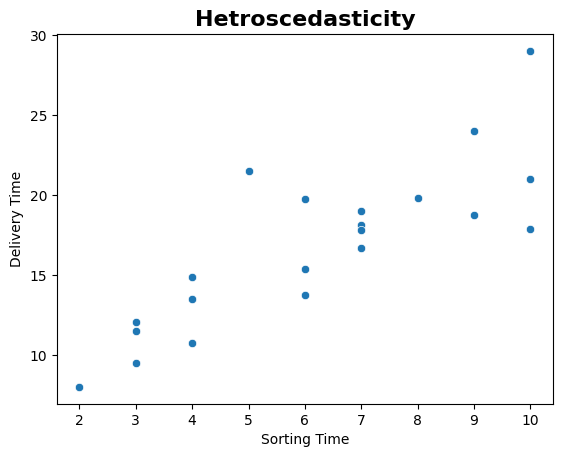

In [74]:
sns.scatterplot(x = 'Sorting Time', y = 'Delivery Time', data= data)
plt.title('Hetroscedasticity', fontweight = 'bold', fontsize = 16)
plt.show()

Below Visualizes how the log transformation modifies the distribution:

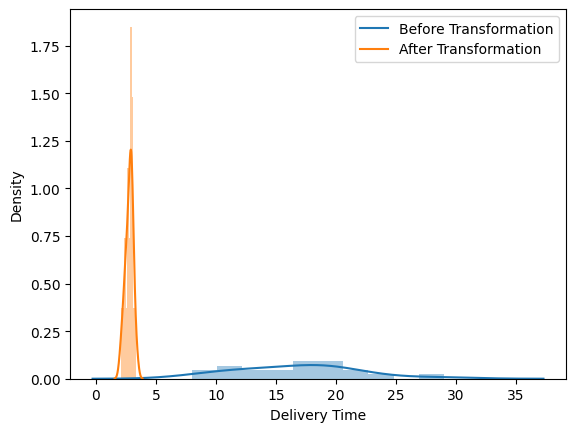

In [75]:
labels = ['Before Transformation','After Transformation']
sns.distplot(data['Delivery Time'], bins = 10, kde = True)
sns.distplot(np.log(data['Delivery Time']), bins = 10, kde = True)
plt.legend(labels)
plt.show()


- Right skewed distribution is converted into normal distribution data by using log transformer

In [76]:
data.columns

Index(['Delivery Time', 'Sorting Time'], dtype='object')

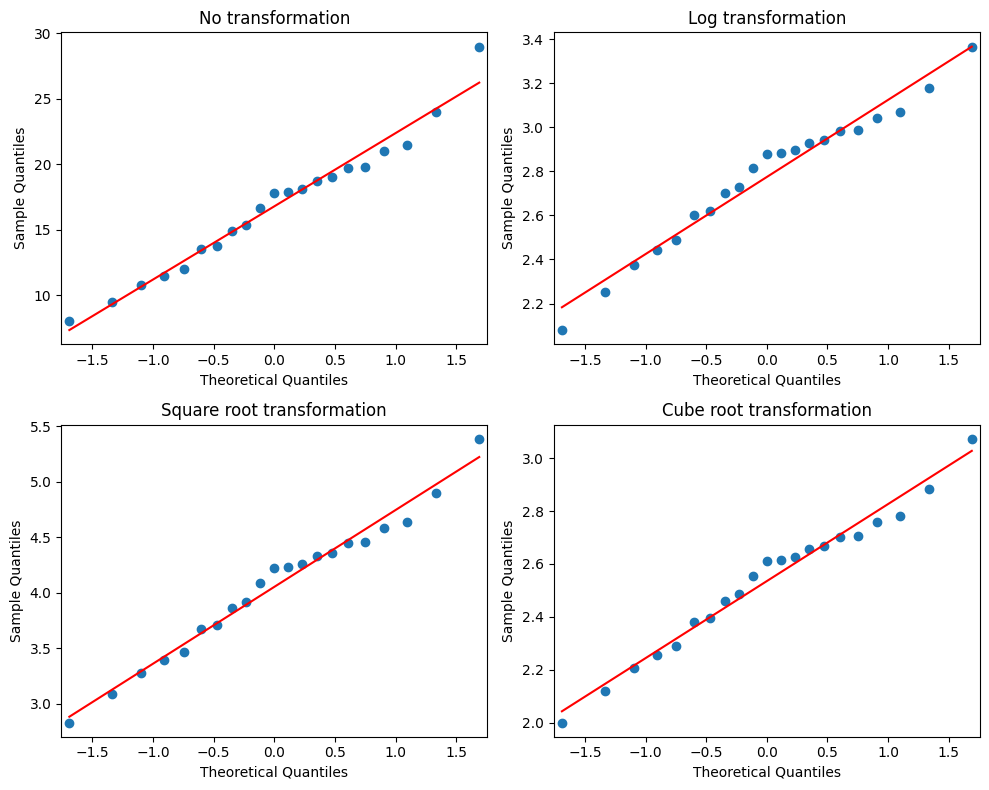

In [77]:
import statsmodels.api as sms
plt.figure(figsize=(10, 8))

plt.subplot(2, 2, 1)
sms.qqplot(data['Delivery Time'], line='r', ax=plt.gca())
plt.title('No transformation')

plt.subplot(2, 2, 2)
sms.qqplot(np.log(data['Delivery Time']), line='r', ax=plt.gca())
plt.title('Log transformation')


plt.subplot(2, 2, 3)
sms.qqplot(np.sqrt(data['Delivery Time']), line='r', ax=plt.gca())
plt.title('Square root transformation')


plt.subplot(2, 2, 4)
sms.qqplot(np.cbrt(data['Delivery Time']), line='r', ax=plt.gca())
plt.title('Cube root transformation')

plt.tight_layout()  
plt.show()

- Among the transformations, the log transformation shows the best improvement in normality.

# Model building and testing

In [78]:
data.rename(columns={'Delivery Time': 'dt'}, inplace=True)


In [79]:
data.rename(columns={'Sorting Time': 'st'}, inplace=True)


In [80]:
model=smf.ols("dt~st",data=data).fit()

In [81]:
model.params

Intercept    6.582734
st           1.649020
dtype: float64

Intercept: It represents the value of the dependent variable when all independent variables are equal to zero.

Sorting time: It indicates that for each unit increase in "Sorting time" the dependent variable is expected to increase by approximately 1.649.

In [82]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                     dt   R-squared:                       0.682
Model:                            OLS   Adj. R-squared:                  0.666
Method:                 Least Squares   F-statistic:                     40.80
Date:                Fri, 10 Jan 2025   Prob (F-statistic):           3.98e-06
Time:                        14:30:56   Log-Likelihood:                -51.357
No. Observations:                  21   AIC:                             106.7
Df Residuals:                      19   BIC:                             108.8
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      6.5827      1.722      3.823      0.001       2.979      10.186
st             1.6490      0.258      6.387      0.000       1.109       2.189
==============================================================================
Omnibus:                        3.649   Durbin-Watson:                   1.248
Prob(Omnibus):                  0.161   Jarque-Bera (JB):                2.086
Skew:                           0.750   Prob(JB):                        0.352
Kurtosis:                       3.367   Cond. No.                         18.3
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### OLS Regression Summary

- **Dependent Variable**: `dt`
- **R-squared**: 0.682 (68.2% of the variance in `dt` is explained by the model)
- **Adjusted R-squared**: 0.666 (66.6% explained, adjusting for predictors)
- **F-statistic**: 40.80 (indicating the model is statistically significant)
- **Prob (F-statistic)**: 3.98e-06 (p-value < 0.05, model is significant)

# t and pvalue

In [83]:
print(model.tvalues, '\n', model.pvalues)

Intercept    3.823349
st           6.387447
dtype: float64 
 Intercept    0.001147
st           0.000004
dtype: float64


# square root

In [84]:
model1 = smf.ols('np.sqrt(dt)~np.sqrt(st)', data = data).fit()


In [85]:
model1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            np.sqrt(dt)   R-squared:                       0.729
Model:                            OLS   Adj. R-squared:                  0.715
Method:                 Least Squares   F-statistic:                     51.16
Date:                Fri, 10 Jan 2025   Prob (F-statistic):           8.48e-07
Time:                        14:30:56   Log-Likelihood:                -5.7320
No. Observations:                  21   AIC:                             15.46
Df Residuals:                      19   BIC:                             17.55
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept       1.6135      0.349      4.628      0.000       0.884       2.343
np.sqrt(st)     1.0022      0.140      7.153      0.000       0.709       1.295
==============================================================================
Omnibus:                        2.869   Durbin-Watson:                   1.279
Prob(Omnibus):                  0.238   Jarque-Bera (JB):                1.685
Skew:                           0.690   Prob(JB):                        0.431
Kurtosis:                       3.150   Cond. No.                         13.7
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

# Cube Root 

In [86]:
import statsmodels.formula.api as smf

In [87]:
model2 = smf.ols('np.cbrt(dt)~np.cbrt(dt)', data = data).fit()

In [88]:
model2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            np.cbrt(dt)   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 6.557e+28
Date:                Fri, 10 Jan 2025   Prob (F-statistic):          4.43e-263
Time:                        14:30:56   Log-Likelihood:                 664.51
No. Observations:                  21   AIC:                            -1325.
Df Residuals:                      19   BIC:                            -1323.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept    5.874e-16   9.95e-15      0.059      0.954   -2.02e-14    2.14e-14
np.cbrt(dt)     1.0000   3.91e-15   2.56e+14      0.000       1.000       1.000
==============================================================================
Omnibus:                        0.356   Durbin-Watson:                   0.017
Prob(Omnibus):                  0.837   Jarque-Bera (JB):                0.014
Skew:                          -0.062   Prob(JB):                        0.993
Kurtosis:                       2.988   Cond. No.                         29.1
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

# Log transformation

In [89]:
model3 = smf.ols('np.log(dt)~np.log(dt)', data = data).fit()

In [90]:
model3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             np.log(dt)   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 6.482e+29
Date:                Fri, 10 Jan 2025   Prob (F-statistic):          1.56e-272
Time:                        14:30:56   Log-Likelihood:                 684.61
No. Observations:                  21   AIC:                            -1365.
Df Residuals:                      19   BIC:                            -1363.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   4.117e-16   3.47e-15      0.119      0.907   -6.85e-15    7.67e-15
np.log(dt)     1.0000   1.24e-15   8.05e+14      0.000       1.000       1.000
==============================================================================
Omnibus:                        6.221   Durbin-Watson:                   0.027
Prob(Omnibus):                  0.045   Jarque-Bera (JB):                5.502
Skew:                           1.230   Prob(JB):                       0.0639
Kurtosis:                       2.513   Cond. No.                         28.3
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

# Model Predictions

In [91]:
newdata=pd.Series([5,10])

In [92]:
data_pred=pd.DataFrame(newdata,columns=['st'])

In [93]:
data_pred

,st
0,5
1,10


In [94]:
model.predict(data_pred)

0    14.827833
1    23.072933
dtype: float64